In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
X = mnist["data"]
y = mnist["target"]

In [5]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

prep_pipeline = Pipeline([
    ("scaler", StandardScaler())
])
X_train = prep_pipeline.fit_transform(X_train)
X_test = prep_pipeline.transform(X_test)

In [7]:
X_val, y_val = X[:10000], y[:10000]

In [8]:
# lets start with LinearSVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

lin_svm_clf = LinearSVC(random_state=42)
param = {
    "penalty": ["l1", "l2"],
    "C": [1, 2, 3, 5, 10, 20, 50]
}
grid = GridSearchCV(lin_svm_clf, param, n_jobs=-1, cv=5)
grid.fit(X_val, y_val)
grid.best_params_

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

{'C': 5, 'penalty': 'l2'}

In [9]:
lin_svm_clf = LinearSVC(**grid.best_params_)
lin_svm_clf.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=5)

In [10]:
from sklearn.metrics import accuracy_score

def get_accuracy_score(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acs_train = accuracy_score(y_train, y_pred_train)
    acs_test = accuracy_score(y_test, y_pred_test)

    print(f"Train accuracy score: {acs_train}.")
    print(f"Test accuracy score: {acs_test}.")

get_accuracy_score(lin_svm_clf, X_train, y_train, X_test, y_test)

Train accuracy score: 0.89465.
Test accuracy score: 0.8882.


In [11]:
X_train2, X_test2 = X[:60000], X[60000:]
y_train2, y_test2 = y[:60000], y[60000:]

In [12]:
import numpy as np

# apparently as float32 it gets even higher scores
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2.astype(np.float32))
X_test2 = scaler.fit_transform(X_test2.astype(np.float32))

clf = LinearSVC(**grid.best_params_)
clf.fit(X_train2, y_train2)
get_accuracy_score(clf, X_train2, y_train2, X_test2, y_test2)

Train accuracy score: 0.898.
Test accuracy score: 0.8912.


/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
param = {
    "C": [1, 5, 10, 25, 50, 100],
    "kernel": ["linear", "poly", "rbf"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 0.5],
    "coef_1": [0.0, 0.2, 0.5, 1]
}
grid = GridSearchCV(lin_svm_clf, param, n_jobs=-1, cv=5)
grid.fit(X_val, y_val)
grid.best_params_

from scipy.stats import racipostal, uniform
from sklearn.model_selection import RandomizedSearchCV

param = {
    "gamma": racipostal
}

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_addons as tfa
import numpy as np

tf.random.set_seed(42)
np.random.seed(42)

In [8]:
import tensorflow_datasets as tfds

(train_raw, val_raw, test_raw), info = tfds.load("mnist", split=["train[:85%]", "train[85%:95%]", "train[95%:]"], as_supervised=True, with_info=True)

C:\Users\pawpo\miniconda3\envs\gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
LABELS = info.features["label"].names
NUM_CLASSES = info.features["label"].num_classes
SIZE = info.splits["train"].num_examples
TRAIN_SIZE, VAL_SIZE, TEST_SIZE = (int(x * SIZE) for x in (0.8, 0.15, 0.05))

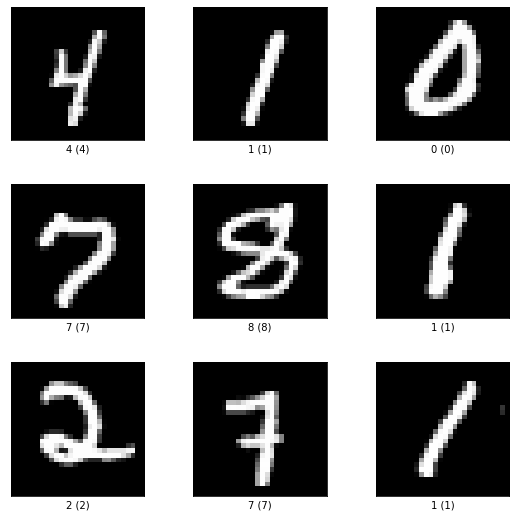

In [4]:
import matplotlib.pyplot as plt

fig = tfds.show_examples(train_raw, info)
plt.show()

In [5]:
BATCH_SIZE = 128
SEED = 123

def configure(ds, shuffle=False):
    ds = ds.cache()

    if shuffle:
        ds = ds.shuffle(1000)

    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

def preprocess(img, label):
    # rnd = tf.random.uniform((), 0, 4, dtype=tf.int32)

    # img = tf.image.random_flip_left_right(img, SEED)
    # img = tf.image.random_flip_up_down(img, SEED)
    # if rnd == 0:
    #     factor = tf.random.uniform((), 1, 4, dtype=tf.int32)
    #     img = tf.image.rot90(img, factor)
    
    # if rnd == 3:
    #     img = tf.image.transpose(img)

    rnd = tf.random.uniform((), -0.3, 0.3, dtype=tf.float32) * np.pi
    img = tfa.image.rotate(img, rnd)
        
    return img, label

train_ds = train_raw.map(lambda x, y: (keras.layers.Rescaling(1.0/255)(x), y))
val_ds = val_raw.map(lambda x, y: (keras.layers.Rescaling(1.0/255)(x), y))
test_ds = test_raw.map(lambda x, y: (keras.layers.Rescaling(1.0/255)(x), y))

train_ds = train_ds.map(preprocess)
train_ds = configure(train_ds, shuffle=True).repeat()
val_ds = configure(val_ds)
test_ds = configure(test_ds)

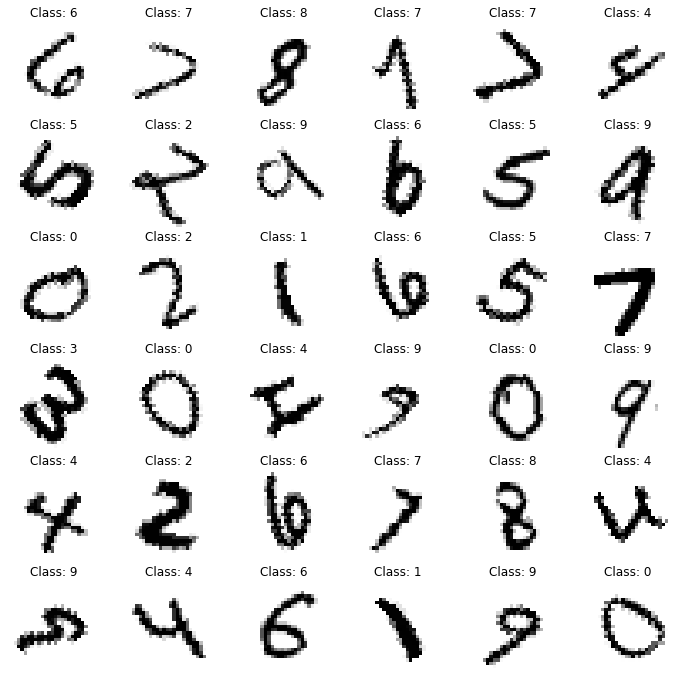

In [6]:
import numpy as np

plt.figure(figsize=(12, 12))
a = 6
for img, label in train_ds.take(1):
    for idx in range(a*a):
        plt.subplot(a, a, idx+1)
        plt.imshow(img[idx], cmap="binary")
        plt.title(f"Class: {LABELS[label[idx]]}")
        plt.axis("off")
plt.show()

In [5]:
from tensorflow.keras import layers
from functools import partial

DefautConv2D = partial(
    layers.Conv2D,
    kernel_size=3,
    activation="relu",
    padding="SAME",
    strides=1
)

def create_model():
    keras.backend.clear_session()

    input_layer = layers.Input(shape=[28, 28, 1])
    X = DefautConv2D(filters=32)(input_layer)
    X = DefautConv2D(filters=64)(X)
    X = layers.Lambda(tf.nn.local_response_normalization)(X)
    X = layers.MaxPooling2D()(X)
    X = DefautConv2D(filters=128)(X)
    X = DefautConv2D(filters=128)(X)
    X = layers.Lambda(tf.nn.local_response_normalization)(X)
    X = layers.GlobalAveragePooling2D()(X)
    X = layers.Flatten()(X)
    X = layers.Dropout(0.2)(X)
    X = layers.Dense(256, activation="relu")(X)
    X = layers.Dense(128, activation="relu")(X)
    X = layers.Dropout(0.5)(X)
    output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(X)

    return keras.Model(inputs=input_layer, outputs=output_layer)

def train_model(model, optimizer, callbacks, epochs, steps_per_epoch):
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        train_ds,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_ds,
        validation_steps=VAL_SIZE/BATCH_SIZE,
        verbose=1,
        epochs=epochs,
        callbacks=callbacks
    )
    return model


Epoch 1/5
  6/375 [..............................] - ETA: 21s - loss: 2.3027 - accuracy: 0.0898WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0215s vs `on_train_batch_end` time: 0.0356s). Check your callbacks.


375/375 [==============================] - 23s 60ms/step - loss: 2.2637 - accuracy: 0.1506 - val_loss: 2.1897 - val_accuracy: 0.1792
Epoch 2/5
375/375 [==============================] - 22s 60ms/step - loss: 2.0336 - accuracy: 0.2369 - val_loss: 1.9195 - val_accuracy: 0.2527
Epoch 3/5
375/375 [==============================] - 22s 59ms/step - loss: 1.9812 - accuracy: 0.2517 - val_loss: 1.9973 - val_accuracy: 0.2290
Epoch 4/5
375/375 [==============================] - 22s 60ms/step - loss: 1.9538 - accuracy: 0.2572 - val_loss: 1.8683 - val_accuracy: 0.2967
Epoch 5/5
375/375 [==============================] - 22s 59ms/step - loss: 1.9299 - accuracy: 0.2660 - val_loss: 1.8480 - val_accuracy: 0.2924


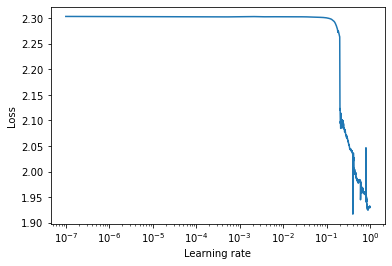

In [13]:
from utils import LRFinder

EPOCH_SIZE = TRAIN_SIZE // BATCH_SIZE

lr_finder = LRFinder(
    min_lr=1e-7,
    max_lr=1,
    steps_per_epoch=EPOCH_SIZE,
    epochs=5
)

model = create_model()

optimizer = keras.optimizers.SGD()
model = train_model(model, optimizer, [lr_finder], 5, EPOCH_SIZE)
lr_finder.plot_loss()

In [14]:
initial_learning_rate = 0.1
maximal_learning_rate = 0.6
step_size = 4 * EPOCH_SIZE
training_steps = 3 * 2 * EPOCH_SIZE # scince lr will be evaluated every 2 steps

cyc_lr = tfa.optimizers.CyclicalLearningRate(
    initial_learning_rate=initial_learning_rate,
    maximal_learning_rate=maximal_learning_rate,
    step_size=step_size,
    scale_fn=lambda x: (1 / (2.0 ** (x - 1))),
    scale_mode="cycle"
)

In [ ]:
optimizer = keras.optimizers.SGD(cyc_lr)

callbacks = [
    keras.callbacks.EarlyStopping(patience=10, monitor="val_accuracy", verbose=1)
]

model = create_model()
model = train_model(model, optimizer, callbacks, 20, training_steps)

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

11501568/11490434 [==============================] - 2s 0us/step


In [ ]:
assert tf.test.is_gpu_available()
assert tf.test.is_built_with_cuda()

In [11]:
model = create_model()

model.compile(
    optimizer="nadam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    verbose=1,
    epochs=20,
    batch_size=128
)

Epoch 1/20
430/430 [==============================] - 38s 67ms/step - loss: 1.1768 - accuracy: 0.5696 - val_loss: 0.3144 - val_accuracy: 0.9194
Epoch 2/20
430/430 [==============================] - 28s 64ms/step - loss: 0.3002 - accuracy: 0.9135 - val_loss: 0.1032 - val_accuracy: 0.9684
Epoch 3/20
430/430 [==============================] - 28s 65ms/step - loss: 0.1642 - accuracy: 0.9542 - val_loss: 0.0682 - val_accuracy: 0.9794
Epoch 4/20
430/430 [==============================] - 28s 65ms/step - loss: 0.1160 - accuracy: 0.9674 - val_loss: 0.0542 - val_accuracy: 0.9832
Epoch 5/20
430/430 [==============================] - 29s 66ms/step - loss: 0.0903 - accuracy: 0.9754 - val_loss: 0.0482 - val_accuracy: 0.98725 - accuracy: 0.
Epoch 6/20
430/430 [==============================] - 29s 67ms/step - loss: 0.0752 - accuracy: 0.9784 - val_loss: 0.0387 - val_accuracy: 0.9908
Epoch 7/20
430/430 [==============================] - 30s 70ms/step - loss: 0.0643 - accuracy: 0.9818 - val_loss: 0.0360